In [6]:

import os , shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #for importing and managing datasets

from keras import backend as K
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten  #Use to convert Pooled image into input later for fully connected layer
from keras.optimizers import Adam
from keras.metrics import binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix
#%matplotlib.inline


import itertools



from sklearn.metrics import confusion_matrix

import tensorflow as tf




In [7]:
train_path = '/home/usojourn/Desktop/stanford_cs230/Project/parcels/training_set'
valid_path = '/home/usojourn/Desktop/stanford_cs230/Project/parcels/validation_set'
test_path = '/home/usojourn/Desktop/stanford_cs230/Project/parcels/test_set'

In [8]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(128,128),classes = ['damaged','undamaged'],batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(128,128),classes = ['damaged','undamaged'],batch_size=200)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size=(128,128),classes = ['damaged','undamaged'],batch_size=200)

Found 1931 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [9]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [10]:
imgs, labels = next(train_batches)

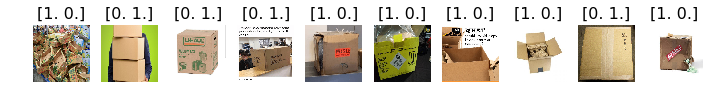

In [11]:
plots(imgs,titles=labels)

In [12]:
model = models.Sequential()
model.add(layers.Convolution2D(32,(3,3), activation='relu',input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Convolution2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Convolution2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Convolution2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Convolution2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))



In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       147584    
__________

In [14]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer= optimizers.RMSprop(lr=.0001),metrics=['acc'])

In [18]:
#Now we prepare to run the images througn the neural network
from keras.preprocessing.image import ImageDataGenerator
'''
#Training image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
'''

#Test image augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#Making sure we have the right dimension size
training_generator = train_datagen.flow_from_directory(
        '/home/usojourn/Desktop/stanford_cs230/Project/parcels/training_set',
        target_size=(128,128),
        batch_size=10,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        '/home/usojourn/Desktop/stanford_cs230/Project/parcels/test_set',
        target_size=(128,128),
        batch_size=10,
        class_mode='binary')



validation_generator = valid_datagen.flow_from_directory(
        '/home/usojourn/Desktop/stanford_cs230/Project/parcels/validation_set',
        target_size=(128,128),
        batch_size=10,
        class_mode='binary')



Found 1931 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [19]:
history = model.fit_generator(
        training_generator,
        steps_per_epoch=193,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=200, verbose=1)

Epoch 1/30
 38/193 [====>.........................] - ETA: 24s - loss: 0.6953 - acc: 0.4763

/home/usojourn/anaconda3/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


193/193 [==============================] - 47s 242ms/step - loss: 0.6907 - acc: 0.5254 - val_loss: 0.6923 - val_acc: 0.4950
Epoch 2/30
193/193 [==============================] - 46s 239ms/step - loss: 0.6762 - acc: 0.5772 - val_loss: 0.6862 - val_acc: 0.5000
Epoch 3/30
193/193 [==============================] - 46s 238ms/step - loss: 0.6601 - acc: 0.5964 - val_loss: 0.6552 - val_acc: 0.6050
Epoch 4/30
193/193 [==============================] - 49s 254ms/step - loss: 0.6442 - acc: 0.6259 - val_loss: 0.6639 - val_acc: 0.5800
Epoch 5/30
193/193 [==============================] - 48s 249ms/step - loss: 0.6212 - acc: 0.6456 - val_loss: 0.6265 - val_acc: 0.6650
Epoch 6/30
193/193 [==============================] - 48s 246ms/step - loss: 0.5945 - acc: 0.6844 - val_loss: 0.6331 - val_acc: 0.6550
Epoch 7/30
193/193 [==============================] - 44s 229ms/step - loss: 0.5676 - acc: 0.6974 - val_loss: 0.5953 - val_acc: 0.6950
Epoch 8/30
193/193 [==============================] - 43s 224ms/st

In [106]:
#model.save('baseline1_0_no_aug_no_drop_lr0001.h5')

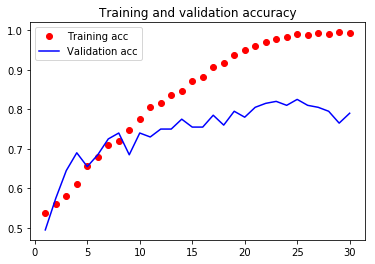

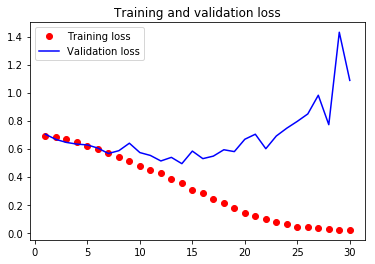

In [95]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo',color='red', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')

plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo',color='red', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()






# Predictions

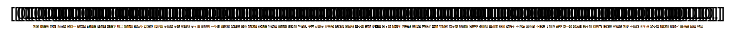

In [43]:
test_images, test_labels = next(test_batches)
plots(test_images, titles=test_labels)


In [44]:

test_labels = test_labels[:,0]
test_labels


array([0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.], dtype=float32)

In [2]:
predict = model.predict_generator(test_batches,steps=1,verbose=0)

In [46]:
predict


array([[1.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [1.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [0.       ],
       [1.       ],
       [0.       ],
       [1.       ],
       [1.       ],


In [50]:
test_labels

array([0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.], dtype=float32)

In [54]:

import math
np.ceil(predict)

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],

In [62]:
cm = confusion_matrix(test_labels,np.ceil(predict))

In [63]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    #This function prints and plots the confusion matrix.
    #Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    

Confusion matrix, without normalization
[[17 83]
 [67 33]]


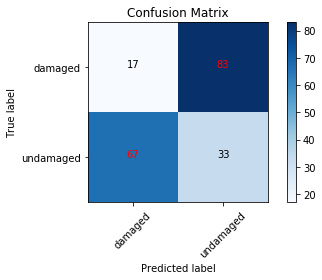

In [64]:
cm_plot_labels = ['damaged', 'undamaged']
plot_confusion_matrix(cm,cm_plot_labels, title='Confusion Matrix')

In [ ]:
K.clear_session()